### Dependencies for this notebook:
* pip install spacy, pandas, matplotlib
* python -m spacy.en.download   

In [1]:
from IPython.display import SVG, display
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#encode some text as uncode
text = u"I'm executing this code on an Apple Computer."

#instantiate a language model
#to download language model: python -m spacy.en.download 
nlp = spacy.load('en') # or spacy.en.English()

#create a document
document = nlp(text)

In [3]:
for function in nlp.pipeline:
    print(function)

In [4]:
### Modifying the Language Model
def identify_starwars(doc):
    for token in doc:
        if token.text == u'starwars':
            token.tag_ = u'NNP'

def return_pipeline(nlp):
    return [nlp.tagger, nlp.parser, nlp.matcher, nlp.entity, identify_starwars]

text = u"I loved all of the starwars movies"
custom_nlp = spacy.load('en', create_pipeline=return_pipeline)
new_document = custom_nlp(text)

for function in custom_nlp.pipeline:
    print(function)

<function identify_starwars at 0x11075e488>


In [5]:
texts = [u'You have brains in your head.'] * 10000

for doc in nlp.pipe(texts,n_threads=4):
    doc.is_parsed

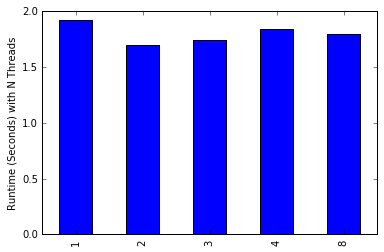

In [6]:
### Deploying Model on Many Texts with .pipe
runtimes = {}

for thread_count in [1,2,3,4,8]:
    t0 =  datetime.now() 
    
    #Create generator of processed documents
    processed_documents = nlp.pipe(texts,n_threads=thread_count)
    
    #Iterate over generator
    for doc in processed_documents: 
        
        #pipeline is only run once we access the generator
        doc.is_parsed 
    
    t1 = datetime.now()
    runtimes[thread_count] = (t1 - t0).total_seconds()
    
ax = pd.Series(runtimes).plot(kind = 'bar')
ax.set_ylabel("Runtime (Seconds) with N Threads")
plt.show()

### Accessing Tokens and Spans

In [8]:
import pandas as pd
def info(obj):
    return {'type':type(obj),'__str__': str(obj)}

text = u"""spaCy excels at large-scale information extraction tasks. 
It's written from the ground up in carefully memory-managed Cython. """
document = nlp(text)
token = document[0]
span = document[0:3]

pd.DataFrame(list(map(info, [token,span,document])))

,__str__,type
0,spaCy,<class 'spacy.tokens.token.Token'>
1,spaCy excels at,<class 'spacy.tokens.span.Span'>
2,spaCy excels at large-scale information extrac...,<class 'spacy.tokens.doc.Doc'>


### Sentence boundary detection

In [15]:
print(list(document.sents))
print()
for i, sent in enumerate(document.sents):
    print('%2d: "%s"' % (i, sent))

[spaCy excels at large-scale information extraction tasks. 
, It's written from the ground up in carefully memory-managed Cython.]

 0: "spaCy excels at large-scale information extraction tasks. 
"
 1: "It's written from the ground up in carefully memory-managed Cython."


### Tokenization

In [17]:
for i, token in enumerate(document):
    print('%2d: "%s"' % (i, token))

 0: "spaCy"
 1: "excels"
 2: "at"
 3: "large"
 4: "-"
 5: "scale"
 6: "information"
 7: "extraction"
 8: "tasks"
 9: "."
10: "
"
11: "It"
12: "'s"
13: "written"
14: "from"
15: "the"
16: "ground"
17: "up"
18: "in"
19: "carefully"
20: "memory"
21: "-"
22: "managed"
23: "Cython"
24: "."


### Morphological decomposition

In [18]:
token = document[13]
print("text: %s" % token.text)
print("suffix: %s" % token.suffix_)
print("lemma: %s" % token.lemma_)

text: written
suffix: ten
lemma: write


### Part of Speech Tagging

In [19]:
#Part of speech and Dependency tagging
attrs = list(map(lambda token: {
                     "token":token,
                     "part of speech":token.pos_,
                     "Dependency" : token.dep_},
                     document))
pd.DataFrame(attrs)

,Dependency,part of speech,token
0,nsubj,NOUN,spaCy
1,ROOT,VERB,excels
2,prep,ADP,at
3,amod,ADJ,large
4,punct,PUNCT,-
5,compound,NOUN,scale
6,compound,NOUN,information
7,compound,NOUN,extraction
8,pobj,NOUN,tasks
9,punct,PUNCT,.


### Noun Chunking

In [20]:
print("noun chunks: %s" % list(document.noun_chunks))

noun chunks: [spaCy, large-scale information extraction tasks, It, the ground]


### Named Entity Recognition

In [21]:
ents = [(ent, ent.root.ent_type_) for ent in document.ents]
print("entities: %s" % ents)

entities: [(Cython, 'ORG')]


### Text Similarity (Using Word Vectors)

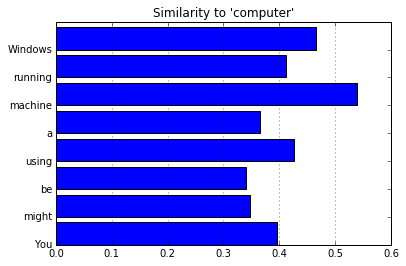

In [23]:
#document, span, and token similarity
def plot_similarities(similarities, target):
    import matplotlib.pyplot as plt
    %matplotlib inline
    f, ax = plt.subplots(1)
    index = range(len(similarities))
    ax.barh(index, similarities)
    ax.set_yticks([i + 0. for i in index])
    ax.set_yticklabels(document2)
    ax.grid(axis='x')
    ax.set_title("Similarity to '{}'".format(target))
    plt.show()
    return ax
    
computer = nlp(u'computer')
document2 = nlp(u'You might be using a machine running Windows')
similarities = list(map(lambda token: token.similarity(computer), document2))
ax = plot_similarities(similarities, computer) 